In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve, classification_report
print('Libraries Imported')
sns.set()

Libraries Imported


# 1. Exploratory Data Analysis (EDA)

In [3]:
data = pd.read_csv('./Datasets/E-Commerce_train.csv', sep = ';')

In [4]:
data.shape

(8999, 12)

In [5]:
data.head(1)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1


In [6]:
# Checking dtypes
display(data.dtypes)

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [8]:
# Checking for null data
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
# Checking for duplicated data
print(f'records duplicated: {data.duplicated().sum()}')

records duplicated: 0


In [10]:
# Describing dataframe
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Median an mean is different for **Discount_offered** and **weight_in_gms** columns -> Check this.

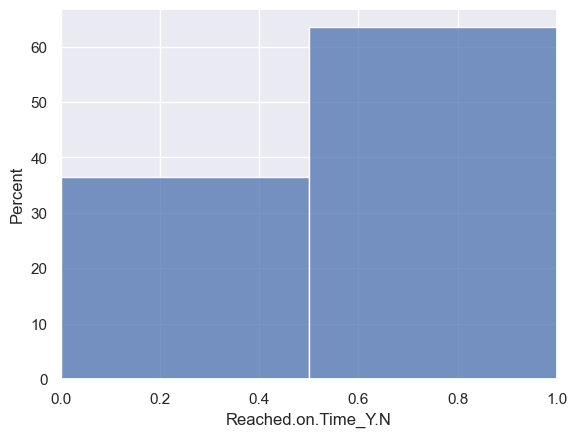

In [141]:
# Let's check Reached.onTime histplot
sns.histplot(data['Reached.on.Time_Y.N'], stat = "percent", bins = 2)
plt.xlim(0,1)
plt.show();

From this we ensure that most orders do not arrive on time. By reaffirming the problem, we can justify our research.

### Checking weights, which of the categorical and numerical variables has more description power

In [125]:
# ID Column gives 0 information
data.drop('ID', axis = 1, inplace = True)

In [150]:
# Countploting discrete categories
categories = data.drop(['Cost_of_the_Product','Weight_in_gms', 'Discount_offered'], axis = 1)

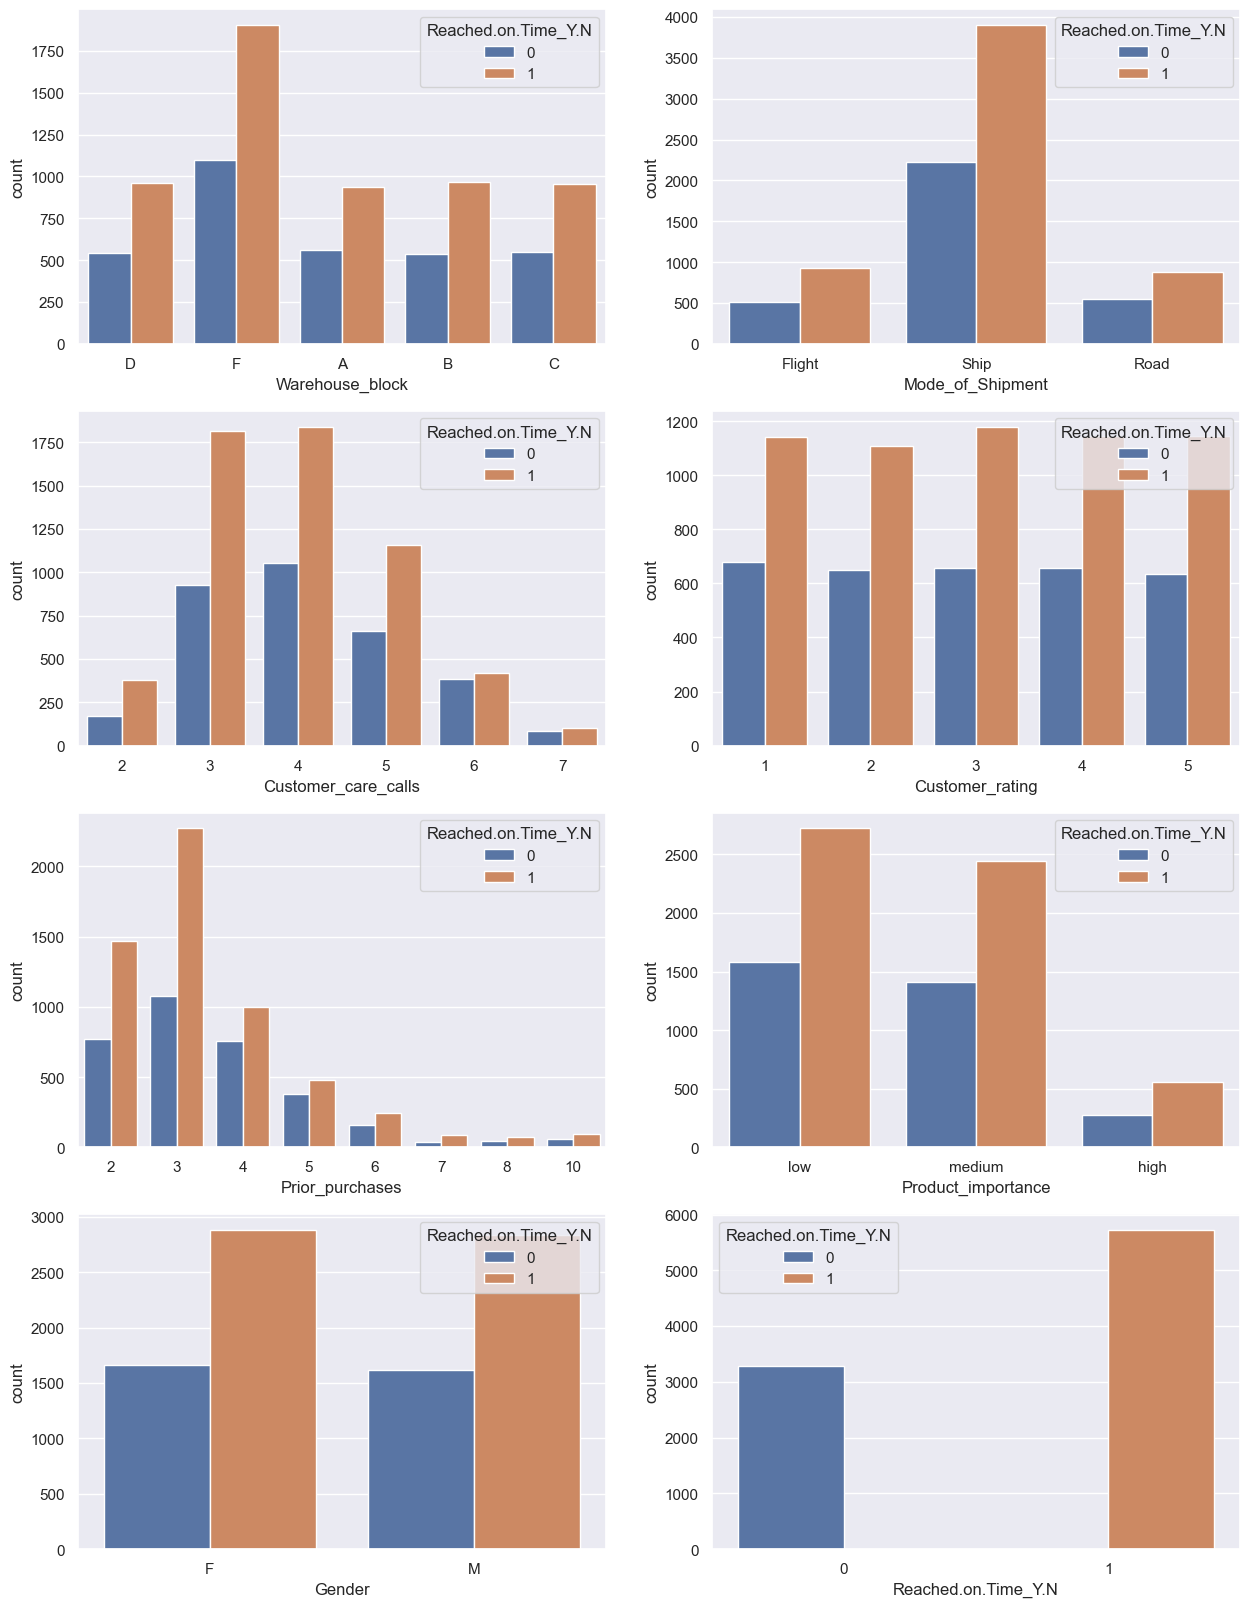

In [151]:
# https://www.youtube.com/watch?v=4DnWYK88-E4
plt.figure(figsize = (15,20))
for i in enumerate(categories):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(x = i[1], hue = "Reached.on.Time_Y.N", data = data)
plt.show();

Observations:
* Warehouse_block F has approximately twice as much data compared to any other block
* The most common type of shipment is by ship
* Rating doesn't affect the quantity of products shipped
* Customers call 4 times on average, yet it isn't strongly reflected in the timely arrival of the product
* Most of the products are low or medium importance
* In general, it is not possible to determine with certainty whether a product will arrive on time or not by looking at individual categories.

<Figure size 1000x1000 with 0 Axes>

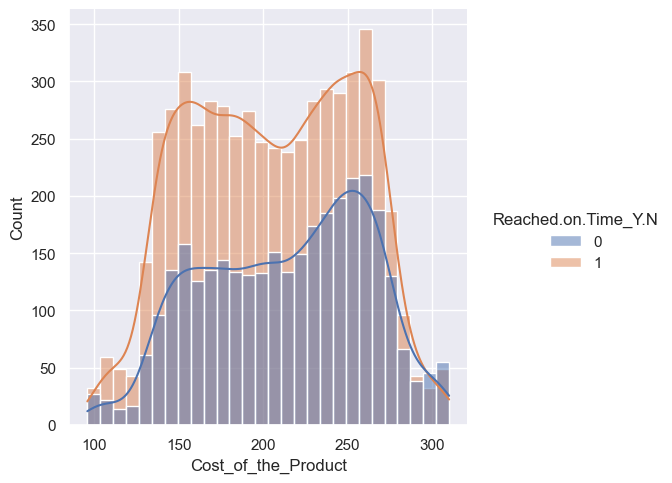

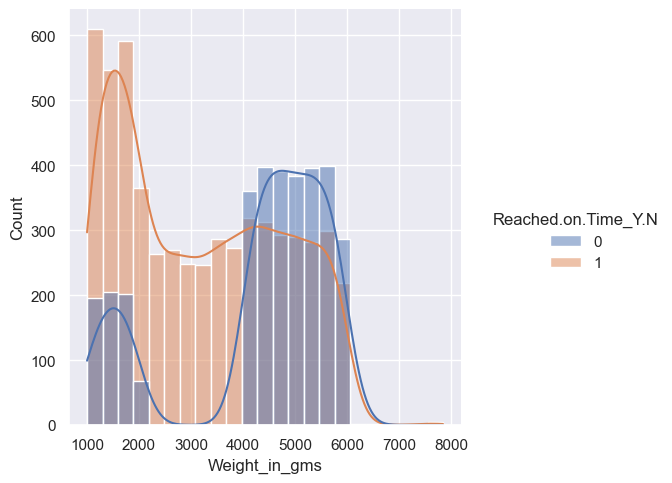

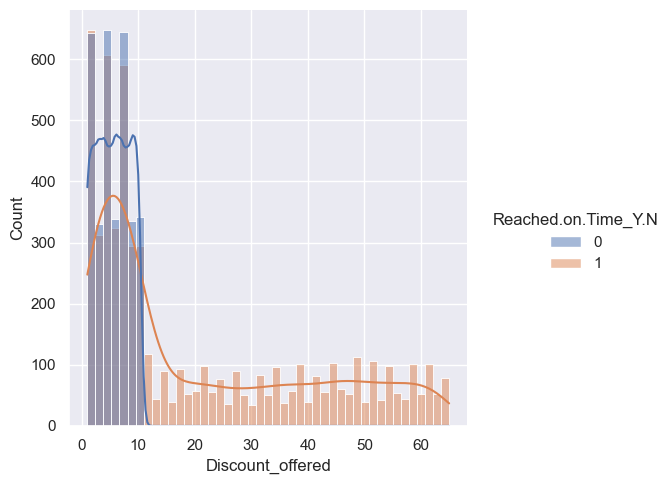

In [186]:
plt.figure(figsize = (10,10))
sns.displot(x = data.Cost_of_the_Product, hue = "Reached.on.Time_Y.N", data = data, kde = True)
sns.displot(x = data.Weight_in_gms, hue = "Reached.on.Time_Y.N", data = data, kde = True)
sns.displot(x = data.Discount_offered, hue = "Reached.on.Time_Y.N", data = data, kde = True)

plt.show();

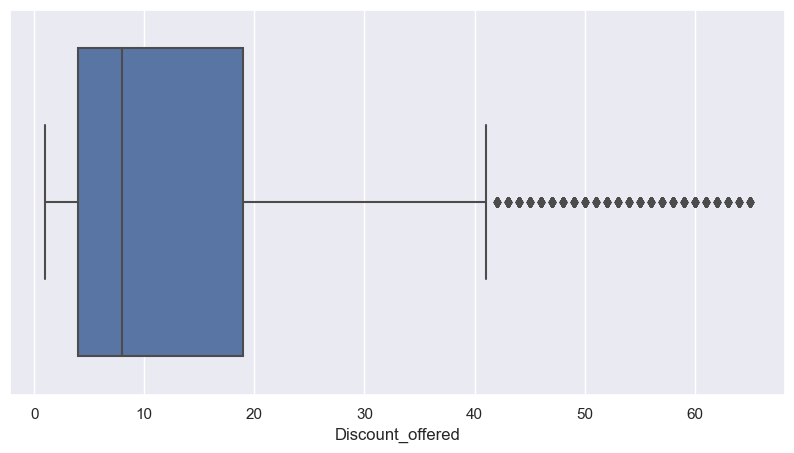

In [188]:
# Discount_offered
plt.figure(figsize = (10,5))
sns.boxplot(x = data.Discount_offered, data = data)
plt.show();

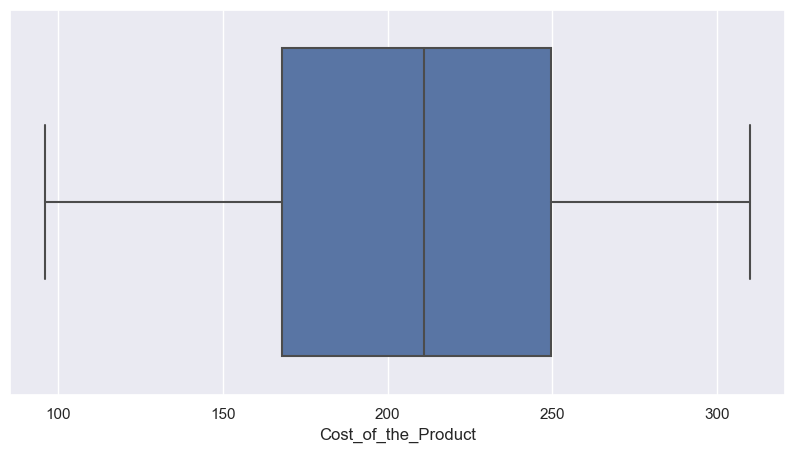

In [178]:
# Cost of the product
plt.figure(figsize = (10,5))
sns.boxplot(x = data.Cost_of_the_Product, hue = "Reached.on.Time_Y.N", data = data)
plt.show();

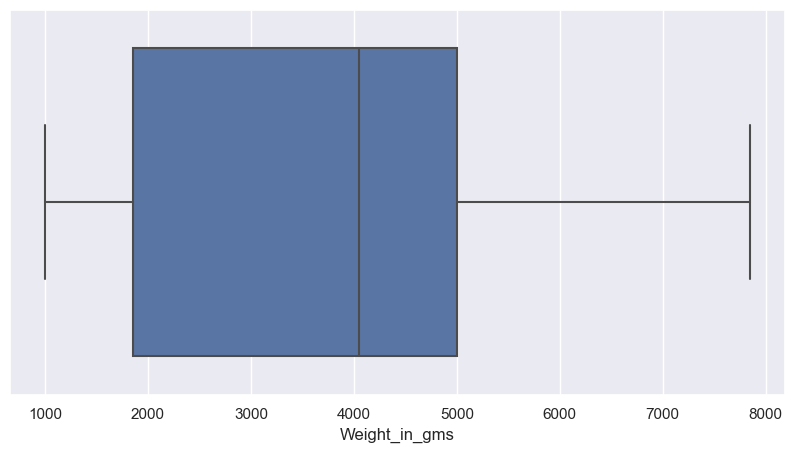

In [179]:
# Weight of the product
plt.figure(figsize = (10,5))
sns.boxplot(x = data.Weight_in_gms, hue = "Reached.on.Time_Y.N", data = data)
plt.show();

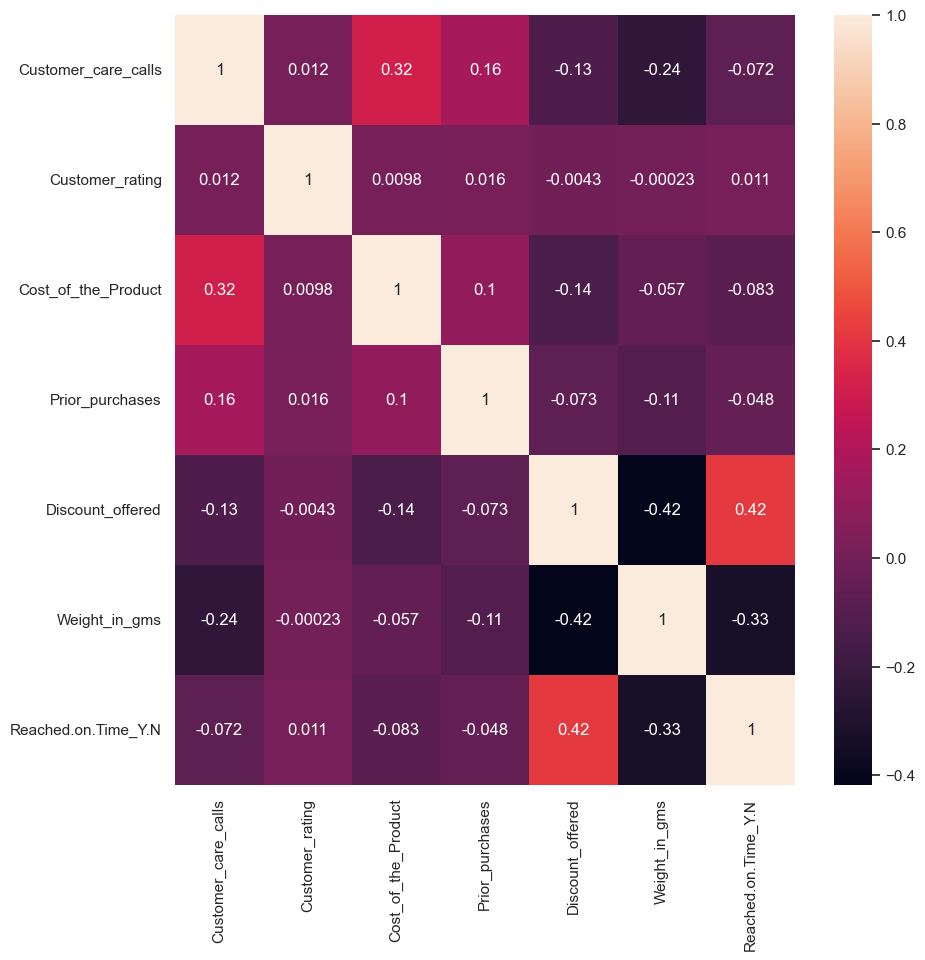

In [152]:
# Checking heatmap for correlation
fig = plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

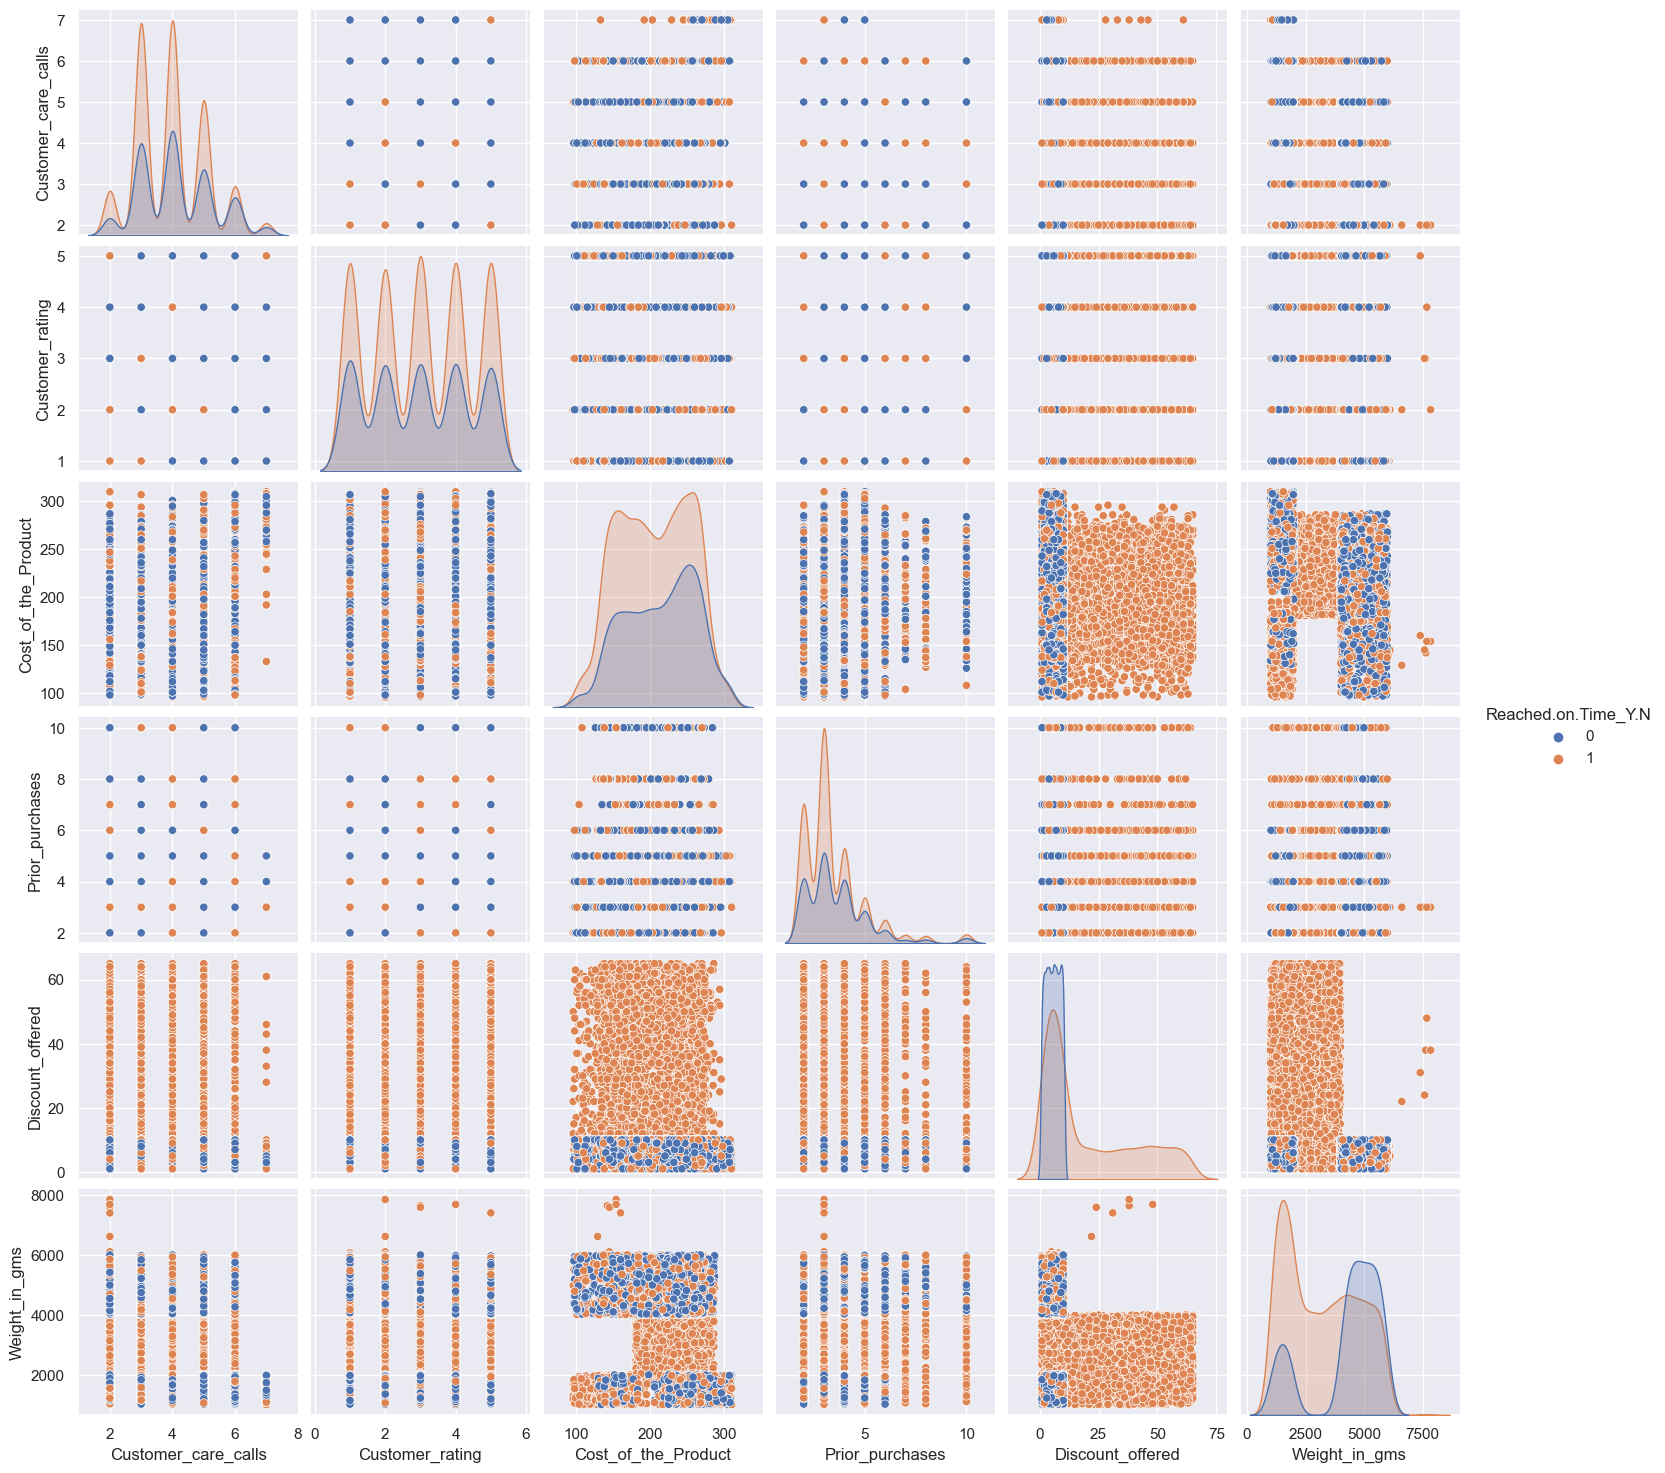

In [185]:
sns.pairplot(data, hue = "Reached.on.Time_Y.N")

**Discount_offered seem to be the variable with the highest classification power**

What about Warehouse block, mode of shiping, product importance and gender?

In [54]:
categorical = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']
for i in categorical:
    tipo = data[i].dtype
    uniques = data[i].unique()
    print(f'{i}: labels: {uniques}, number: {len(uniques)}','\n')

Warehouse_block: labels: ['D' 'F' 'A' 'B' 'C'], number: 5 

Mode_of_Shipment: labels: ['Flight' 'Ship' 'Road'], number: 3 

Product_importance: labels: ['low' 'medium' 'high'], number: 3 

Gender: labels: ['F' 'M'], number: 2 



Since these columns are categorical values, the question here is what type of encoder are we going to use? One Hot Encoding (OHE), Label Encoder, Pandas Factorize? It seems like the answer is here. https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor. 

### I'm going to play with OHE. And here are the main reasons:
    * Relative low numbers of columns
    * Gender, Warehouse and mode of shipping are nominal data
    * Later I want to have a little fun with PCA

Hypothesis: We will go from 11 columns to 20

In [189]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data[categorical]).toarray()
feature_labels = ohe.categories_

In [190]:
# Ravel was not working for me. How to flat then? https://stackoverflow.com/questions/61255108/python-numpy-ravel-function-not-flattening-array
feature_labels = np.hstack(feature_labels).ravel()
features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,A,B,C,D,F,Flight,Road,Ship,high,low,medium,F,M
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [191]:
df = pd.concat([data, features], axis = 1)
df.drop(categorical, axis = 1, inplace = True)

<AxesSubplot:>

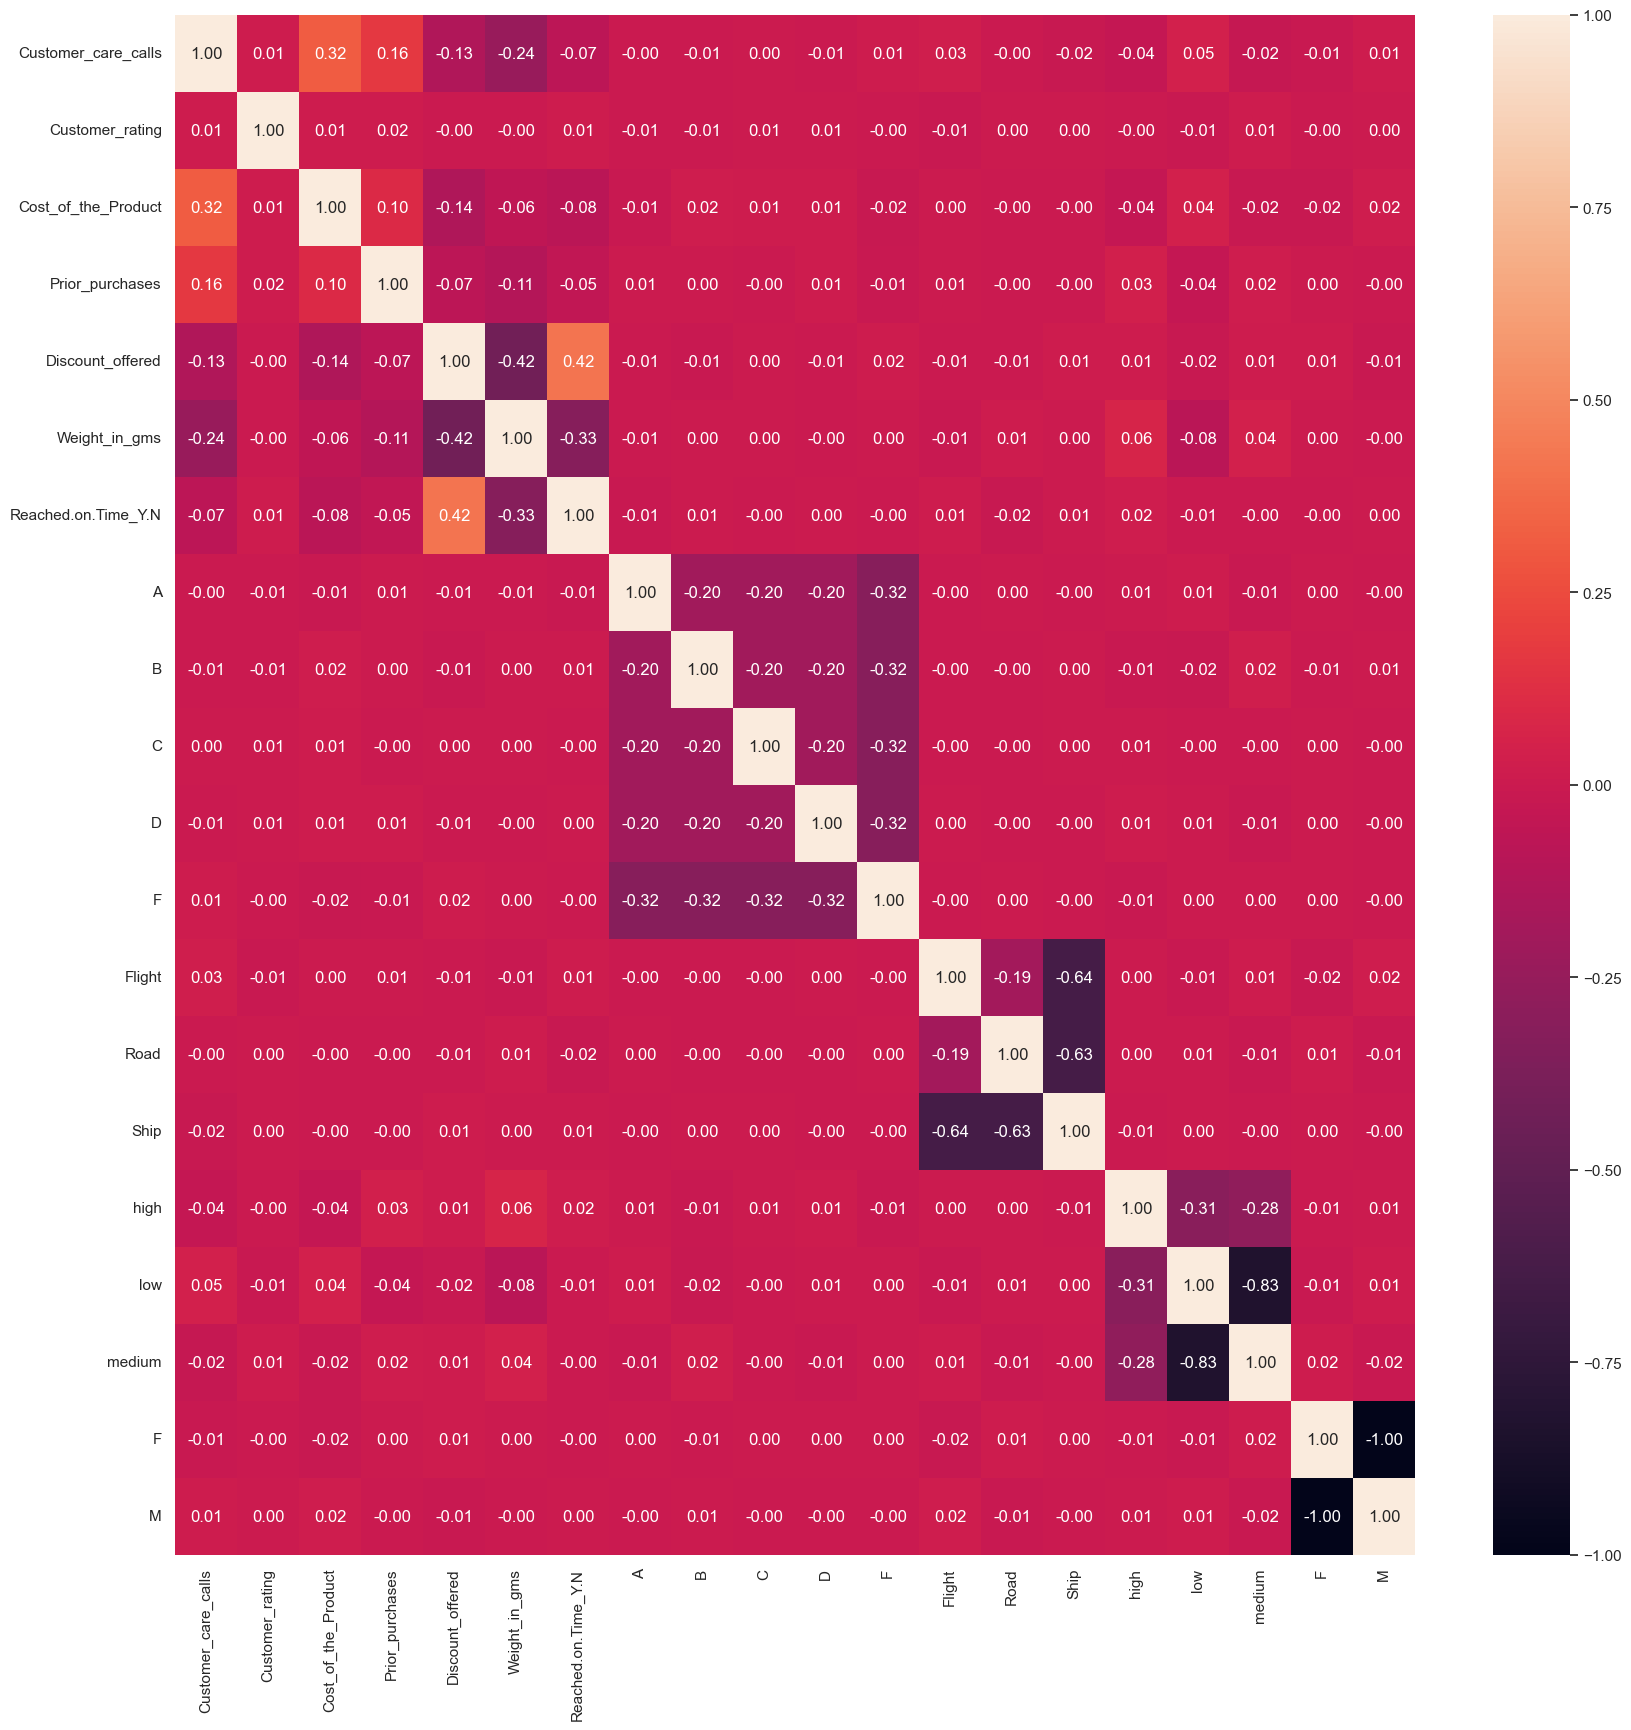

In [193]:
# Checking heatmap for correlation
fig = plt.figure(figsize = (20,20))
corr = df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

### First modeling batch

In [282]:
# Defining our variables
X = df.drop('Reached.on.Time_Y.N', axis = 1)
y = df['Reached.on.Time_Y.N']
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(f'# Train values: {X_train.shape[0]} # Test values {X_test.shape[0]}')

# Train values: 7199 # Test values 1800


In [302]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [303]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.367
Recall score en test: 0.0


In [304]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.633
Recall score en test: 1.0


In [305]:
from sklearn.svm import SVC  
clf = SVC()
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.633
Recall score en test: 1.0


In [306]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 200, random_state = 101)
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.633
Recall score en test: 1.0


In [307]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_train_preds = clf.predict(X_train)
y_test_preds = clf.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.633
Recall score en test: 1.0


In [237]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [309]:
model = AdaBoostClassifier(n_estimators = 1000, learning_rate = 1)
model.fit(X_train, y_train)
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Accuracy en test: 0.633
Recall score en test: 1.0


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(f'# Train values: {X_train.shape[0]} # Test values {X_test.shape[0]}')
logmodel = LogisticRegression()

model = AdaBoostClassifier(n_estimators = 100, learning_rate = 2, base_estimator = logmodel)
model.fit(X_train, y_train)
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

#print(f'Accuracy en train: {round(accuracy_score(y_train, y_train_preds),3)}')
print(f'Accuracy en test: {round(accuracy_score(y_test, y_test_preds),3)}')
#print(f'Recall score en train: {round(recall_score(y_train, y_train_preds),4)}')
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

# Train values: 7199 # Test values 1800
Accuracy en test: 0.664
Recall score en test: 0.7463


In [286]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
# Defining base models
estimators = [('knn', KNeighborsClassifier(n_neighbors = 5)), ('dtc', DecisionTreeClassifier()), ('gnb', GaussianNB(), 'svc', SVC())]
# Defining meta model since is a binary result -> LogisticRegression works perfect
meta = LogisticRegression()

stackingclf = StackingClassifier(estimators = estimators, final_estimator = meta)
stackingclf.fit(X_train, y_train)

y_test_preds = stackingclf.predict(X_test)
print(f'Recall score en test: {round(recall_score(y_test, y_test_preds),4)}')

Recall score en test: 0.7234


### Second Modeling batch

In [267]:
# Working with test dataset
test_data = pd.read_csv('./Datasets/E-Commerce_test.csv', sep = ";")
test_data.drop('ID', axis = 1, inplace = True)

In [273]:
# Defining categorical features
categorical = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']
# Encoding categorical features
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(test_data[categorical]).toarray()
feature_labels = np.hstack(ohe.categories_).ravel()
# Concating dataframes and creating the final one
features = pd.DataFrame(feature_array, columns = feature_labels)
test_df = pd.concat([test_data, features], axis = 1)
test_df.drop(categorical, axis = 1, inplace = True)

In [289]:
from sklearn.preprocessing import StandardScaler
# Defining our variables
X = test_df
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [293]:
clf = SVC()
clf.fit(X_train, y_train)
y_test_preds = clf.predict(X_scaled)
y_test_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [299]:
file = pd.DataFrame(y_test_preds, columns = ['pred'])

In [300]:
file.to_csv('Jeanfabra.csv', index = False)